In [1]:
import pandas as pd
import numpy as np
import SimpleITK
import os

In [2]:
def load_dicom_series(input_dir):
    """Reads an entire DICOM series of slices from 'input_dir' and returns its pixel data as an array."""

    reader = SimpleITK.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(input_dir)
    reader.SetFileNames(dicom_names)
    dicom_series = reader.Execute()

    dicom_array = SimpleITK.GetArrayFromImage(dicom_series)
    dicom_array = np.moveaxis(dicom_array, 0, -1)
    return dicom_array

In [3]:
def get_image_patch(img_array, coords, padding=32):


    """ Description
    :type img_array: numpy array
    :param img_array: a image comprised of a numpy array

    :type coords: list(i,j)
    :param coords: The coordinates where the crop will be centered, of type (i,j), i being the columns and j the row

    :type padding: int or list(x,y)
    :param padding: The padding that will be around the center coordinates. If an int, it will create a square image. If a list x is the horizontal padding and y the vertical

    :raises:

    :rtype:
     """

    i = coords[0]
    j = coords[1]

    if isinstance(padding, list):
        h_padding = padding[0]
        v_padding = padding[1]
    else:
        h_padding = padding
        v_padding = padding

    X_ = img_array[j - v_padding: j + v_padding, i - h_padding: i + h_padding]
    # NUMPY ARRAYs are of standart (row, columns)

    return X_

In [4]:
metadata = pd.read_csv("../data/interim/train_information.csv")


In [5]:
metadata = pd.read_csv("../data/interim/train_information.csv")
base_path = "../data/interim/train/"
metadata.head()

,Unnamed: 0,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum,zone,ClinSig,i,j,k
0,0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7.0,PZ,True,36,72,9
1,1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6.0,PZ,True,36,72,9
2,2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6.0,PZ,True,36,72,9
3,3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6.0,PZ,True,36,72,9
4,4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8.0,PZ,True,36,72,9


In [11]:
metadata = metadata[metadata.DCMSerDescr == "ep2d_diff_tra_DYNDIST"]
folders_to_crawl = metadata.drop_duplicates(["ProxID", "DCMSerDescr"])[["ProxID", "DCMSerDescr"]]


In [12]:
s = 0
i = 0

X = []
y = []


for obs in folders_to_crawl.itertuples():    
    b = (metadata.ProxID == obs.ProxID)
    a = (metadata.DCMSerDescr == obs.DCMSerDescr)
    lesions_of_interest = metadata[b & a]
    
    

    
    exam_folder = os.path.join(base_path, obs.ProxID, obs.DCMSerDescr)
    
    image = load_dicom_series(input_dir=exam_folder)
    # print(image.shape)
    
    print(exam_folder)
    
    for lesion in lesions_of_interest.itertuples():
        if(lesion.k < image.shape[2]):
            slice_array = image[:,:, lesion.k]
            patch = get_image_patch(slice_array, (lesion.i, lesion.j), padding=32)
            s = s+1

        else:
            print("error importing: {} {} k: {} length: {}".format(obs.ProxID, obs.DCMSerDescr, lesion.k, image.shape[2]) )
            i = i + 1
            
        if(patch.shape == (64,64)):
            y_ = 1 if lesion.ClinSig else 0

            X.append(patch)
            y.append(y_)

X_np = np.asarray(X).reshape((-1, 64,64, 1))
            

print("PRC sucess {} / {}".format(i, i+s))
            
        
    

        
    

../data/interim/train/ProstateX-0000/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0002/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0003/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0006/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0007/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0008/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0009/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0010/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0011/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0012/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0016/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0017/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0018/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0020/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0021/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0022/ep2d_diff_tra_DYNDIST
../data/interim/train/ProstateX-0023/ep2d_diff_tra_DYNDI

In [9]:
X_np.shape

(723, 64, 64, 1)

In [78]:
np.save("../data/processed/X.npy", X_np)
np.save("../data/processed/y.npy", y)

In [38]:
obs.ProxID

'ProstateX-0000'

In [39]:
obs.DCMSerDescr

'ep2d_diff_tra_DYNDIST_ADC'

In [50]:
t2_twe_path = '/home/paulo/testes/t2_tse_tra'
ep2d_path = '/home/paulo/Projects/thesis/prostatex/data/interim/train/ProstateX-0000/ep2d_diff_tra_DYNDISTCALC_BVAL'

In [16]:
aa = load_dicom_series(t2_twe_path)
aa.shape

(384, 384, 19)

In [9]:
import matplotlib.pyplot as plt

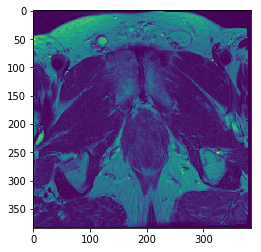

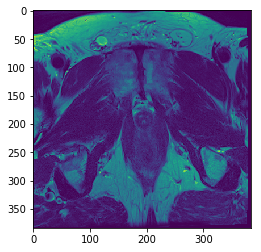

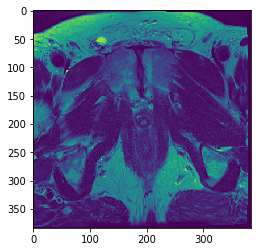

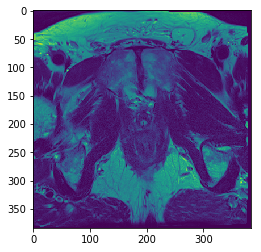

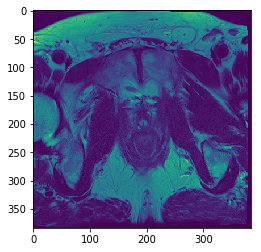

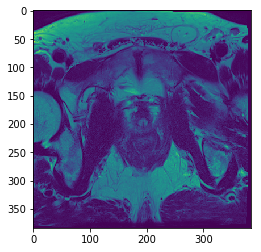

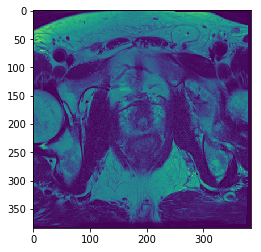

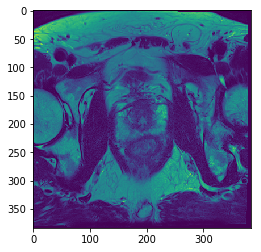

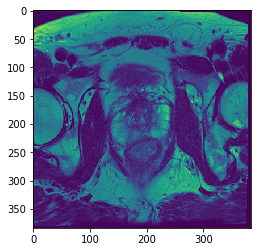

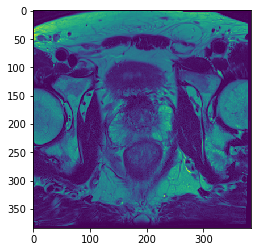

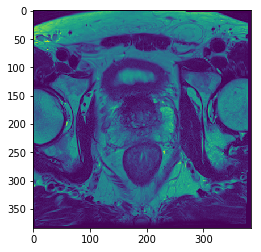

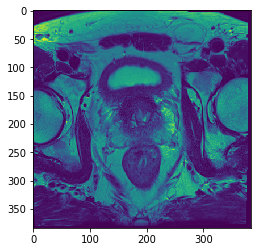

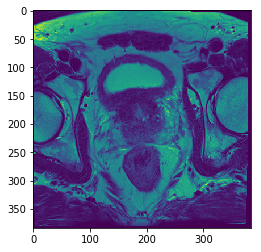

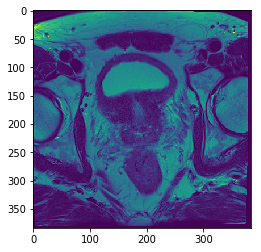

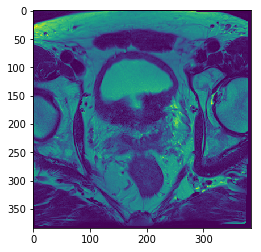

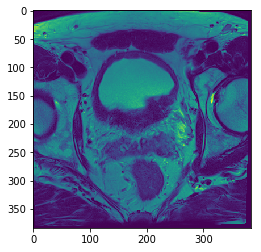

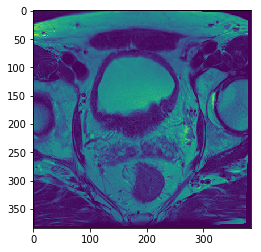

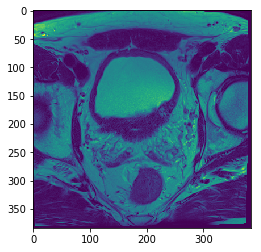

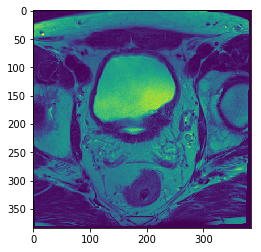

In [18]:
for a in range(19):
    plt.imshow(aa[:, :, a])
    plt.show()

In [15]:
for a in range(40):
    print(a)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [19]:
  
def write_dim(input_dir):
    reader = SimpleITK.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(input_dir)
    reader.SetFileNames(dicom_names)
    dicom_series = reader.Execute()

    return dicom_series

In [26]:
aaa = write_dim(t2_twe_path)

In [27]:
SimpleITK.WriteImage(aaa, 'home/paulo/testes/werwer.dcm' )

RuntimeError: Exception thrown in SimpleITK WriteImage: /tmp/SimpleITK-build/ITK/Modules/IO/ImageBase/src/itkImageIOBase.cxx:677:
itk::ERROR: GDCMImageIO(0x55bf14f77f50): Could not open file: home/paulo/testes/werwer.dcm for writing.
Reason: No such file or directory

In [28]:
aaa.Sa

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7f4285ee0cf0> >

In [40]:
def writeSlices( new_img,series,_tag_values i):
    image_slice = new_img[:,:,i]

    # Tags shared by the series.
    list(map(lambda tag_value: image_slice.SetMetaData(tag_value[0], tag_value[1]), series_tag_values))

    # Setting the type to CT preserves the slice location.
    image_slice.SetMetaData("0008|0060", "CT")  # set the type to CT so the thickness is carried over

    # Write to the output directory and add the extension dcm, to force writing in DICOM format.
    writer.SetFileName(os.path.join('/home/paulo/testes/',str(i)+'.dcm'))
    writer.Execute(image_slice)
writer = SimpleITK.ImageFileWriter()
# Use the study/series/frame of reference information given in the meta-data
# dictionary and not the automatically generated information from the file IO
writer.KeepOriginalImageUIDOn()   


In [41]:

list(map(lambda i: writeSlices( aaa, i), range(aaa.GetDepth())))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [42]:
os.listdir(t2_twe_path)

['000009.dcm',
 '000002.dcm',
 '000008.dcm',
 '000003.dcm',
 '000016.dcm',
 '000012.dcm',
 '000013.dcm',
 '000007.dcm',
 '000006.dcm',
 '_31_To__41.mtx',
 '000011.dcm',
 '000014.dcm',
 '000017.dcm',
 '000018.dcm',
 '000001.dcm',
 '000015.dcm',
 '000005.dcm',
 '000000.dcm',
 '000010.dcm',
 '000004.dcm']

In [57]:
import pydicom

for p in os.listdir(t2_twe_path):
    original = os.path.join(t2_twe_path, p)
    
    dest = os.path.join(t2_twe_path, "T_" + p)
    
    os.rename(original,dest)


    
    

1
9
8
10
19
4
15
13
6
3
5
2
14
12
17
18
16
11
7


In [69]:
for p in os.listdir(t2_twe_path):
    file_path = os.path.join(t2_twe_path, p)
    
    img_file = pydicom.read_file(file_path)
    file_name = "{}.dcm".format(str(img_file.InstanceNumber).rjust(6, "0"))
    
    dest = os.path.join(t2_twe_path, file_name)
    
    os.rename(file_path,dest)

In [54]:
t2_twe_path

'/home/paulo/testes/t2_tse_tra'

In [65]:
s="23456"
s.rjust(10,"0")

'0000023456'

In [71]:
def reorder_files(path):
    for p in os.listdir(path):
        file_path = os.path.join(path, p)

        img_file = pydicom.read_file(file_path)
        file_name = "{}.dcm".format(str(img_file.InstanceNumber).rjust(6, "0"))

        dest = os.path.join(path, file_name)

        os.rename(file_path,dest)

In [74]:
base_path = '../data/raw/train/'
patients = os.listdir(base_path)

In [76]:
for pats in patients:
    patient_path = os.path.join(base_path, pats)
    exam_list = os.listdir(patient_path)
    
    for exam in exam_list:
        exam_path = os.path.join(patient_path, exam)
        
        print(exam_path)
    

../data/raw/train/ProstateX-0014/t2_tse_tra
../data/raw/train/ProstateX-0014/ep2d_diff_tra_DYNDIST_MIXCALC_BVAL
../data/raw/train/ProstateX-0014/t2_tse_cor
../data/raw/train/ProstateX-0014/ep2d_diff_tra_DYNDIST_MIX_ADC
../data/raw/train/ProstateX-0014/KTrans
../data/raw/train/ProstateX-0014/ep2d_diff_tra_DYNDIST_MIX
../data/raw/train/ProstateX-0014/tfl_3d PD ref_tra_1.5x1.5_t3
../data/raw/train/ProstateX-0014/t2_tse_sag
../data/raw/train/ProstateX-0066/t2_loc sag
../data/raw/train/ProstateX-0066/t2_tse_tra
../data/raw/train/ProstateX-0066/t2_localizer
../data/raw/train/ProstateX-0066/t2_tse_cor
../data/raw/train/ProstateX-0066/ep2d_diff_tra_DYNDIST
../data/raw/train/ProstateX-0066/ep2d_diff_tra_DYNDISTCALC_BVAL
../data/raw/train/ProstateX-0066/KTrans
../data/raw/train/ProstateX-0066/ep2d_diff_tra_DYNDIST_ADC
../data/raw/train/ProstateX-0066/tfl_3d PD ref_tra_1.5x1.5_t3
../data/raw/train/ProstateX-0066/t2_tse_sag
../data/raw/train/ProstateX-0114/t2_tse_tra
../data/raw/train/ProstateX-01